In [1]:
import photonIsoCorrect as pic
reload(pic)

Welcome to ROOTaaS 6.06/08


<module 'photonIsoCorrect' from 'photonIsoCorrect.pyc'>

In [2]:
treeData = pic.IO.getTree("exo/spring16/tnpTuples_ichep/Formatted_output_SingleElectron.root",
                          "tnpAna/TaPTree")
treeMC = pic.IO.getTree("exo/spring16/tnpTuples_ichep/Formatted_output_DYToEE_NNPDF30_13TeV-powheg-pythia8__63mb.root",
                          "tnpAna/TaPTree")
correct = pic.Corrector(treeData,treeMC)

In [3]:
treeData,treeMC

(<ROOT.TTree object ("TaPTree") at 0x4ab42a0>,
 <ROOT.TTree object ("TaPTree") at 0x4b9a910>)

In [4]:
import numpy as np

In [5]:
rhobins = np.linspace(0,21.,8)
isobins = np.linspace(0,4.,101)

histos_eb = correct.mkIsoHistos(rhobins,"probe_phoiso","eb_%d_%d",isobins,"weight*(abs(probe_eta)<1.5)")


(<ROOT.TTree object ("TaPTree") at 0x4ab42a0>, 'hdata_')
hdata_eb_0_3
hdata_eb_3_6
hdata_eb_6_9
hdata_eb_9_12
hdata_eb_12_15
hdata_eb_15_18
hdata_eb_18_21
(<ROOT.TTree object ("TaPTree") at 0x4b9a910>, 'hmc_')
hmc_eb_0_3
hmc_eb_3_6
hmc_eb_6_9
hmc_eb_9_12
hmc_eb_12_15
hmc_eb_15_18
hmc_eb_18_21


In [6]:
print zip(rhobins,rhobins[1:])

[(0.0, 3.0), (3.0, 6.0), (6.0, 9.0), (9.0, 12.0), (12.0, 15.0), (15.0, 18.0), (18.0, 21.0)]


In [7]:
print isobins

[ 0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4   0.44
  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88  0.92
  0.96  1.    1.04  1.08  1.12  1.16  1.2   1.24  1.28  1.32  1.36  1.4
  1.44  1.48  1.52  1.56  1.6   1.64  1.68  1.72  1.76  1.8   1.84  1.88
  1.92  1.96  2.    2.04  2.08  2.12  2.16  2.2   2.24  2.28  2.32  2.36
  2.4   2.44  2.48  2.52  2.56  2.6   2.64  2.68  2.72  2.76  2.8   2.84
  2.88  2.92  2.96  3.    3.04  3.08  3.12  3.16  3.2   3.24  3.28  3.32
  3.36  3.4   3.44  3.48  3.52  3.56  3.6   3.64  3.68  3.72  3.76  3.8
  3.84  3.88  3.92  3.96  4.  ]


In [8]:
histos_eb

[[<ROOT.TH1D object ("hdata_eb_0_3") at 0x4b59d50>,
  <ROOT.TH1D object ("hdata_eb_3_6") at 0x5008110>,
  <ROOT.TH1D object ("hdata_eb_6_9") at 0x5008630>,
  <ROOT.TH1D object ("hdata_eb_9_12") at 0x5042de0>,
  <ROOT.TH1D object ("hdata_eb_12_15") at 0x5029e60>,
  <ROOT.TH1D object ("hdata_eb_15_18") at 0x500bed0>,
  <ROOT.TH1D object ("hdata_eb_18_21") at 0x5006b80>],
 [<ROOT.TH1D object ("hmc_eb_0_3") at 0x4f73050>,
  <ROOT.TH1D object ("hmc_eb_3_6") at 0x50420a0>,
  <ROOT.TH1D object ("hmc_eb_6_9") at 0x50364c0>,
  <ROOT.TH1D object ("hmc_eb_9_12") at 0x5009280>,
  <ROOT.TH1D object ("hmc_eb_12_15") at 0x5037410>,
  <ROOT.TH1D object ("hmc_eb_15_18") at 0x5037bb0>,
  <ROOT.TH1D object ("hmc_eb_18_21") at 0x5004f90>]]

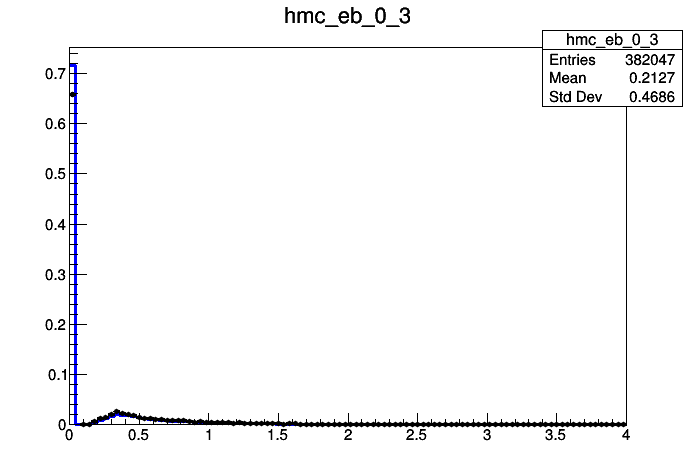

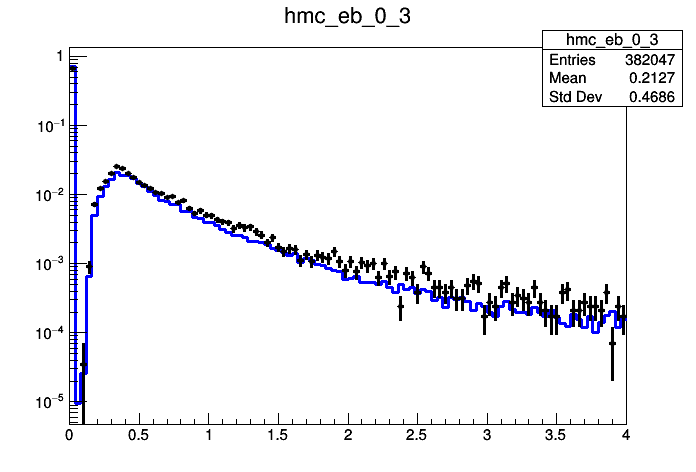

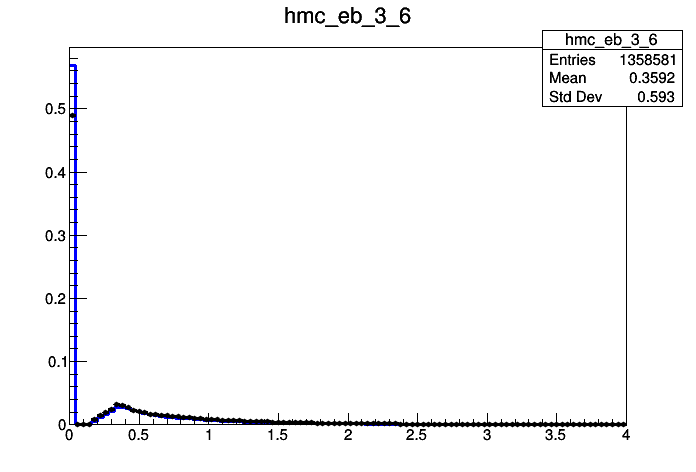

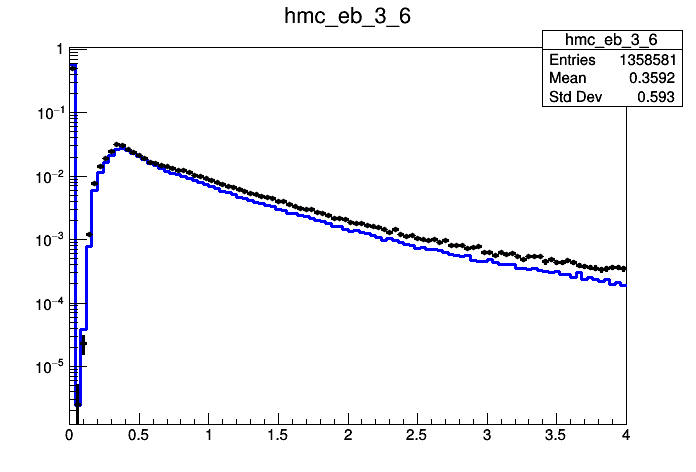

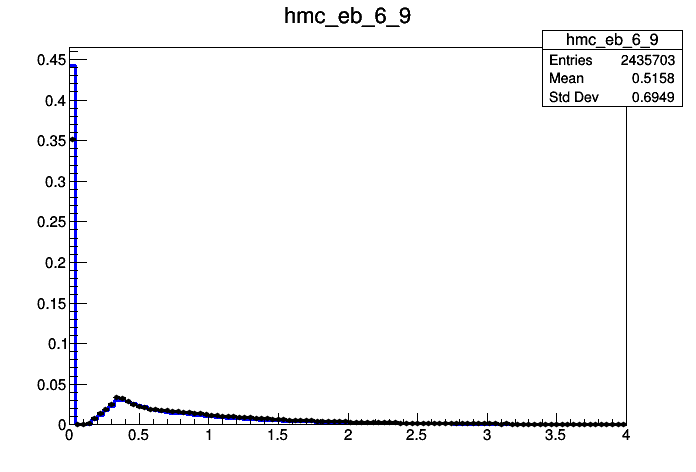

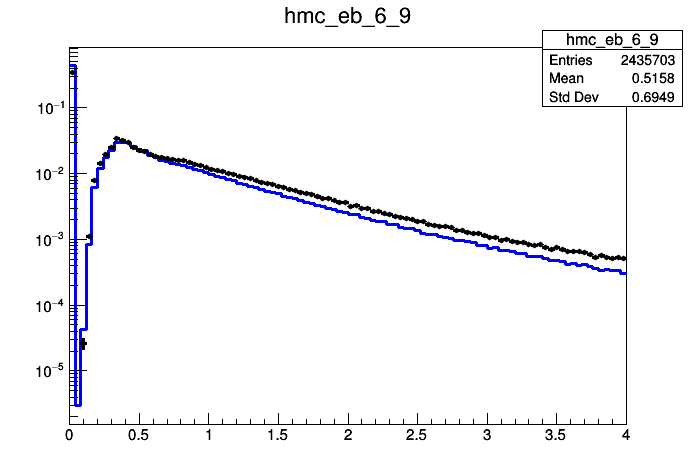

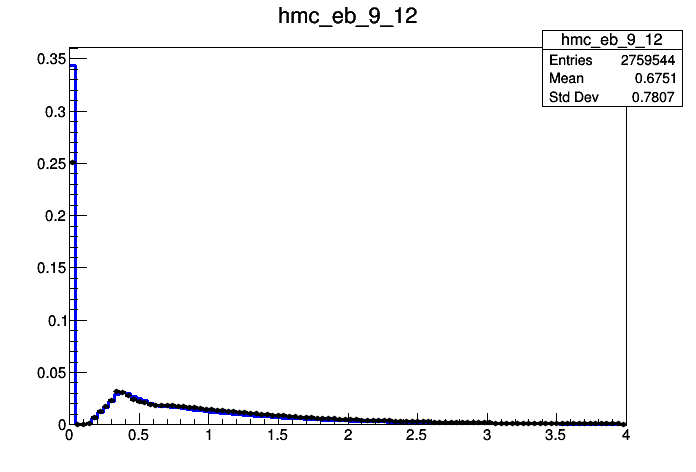

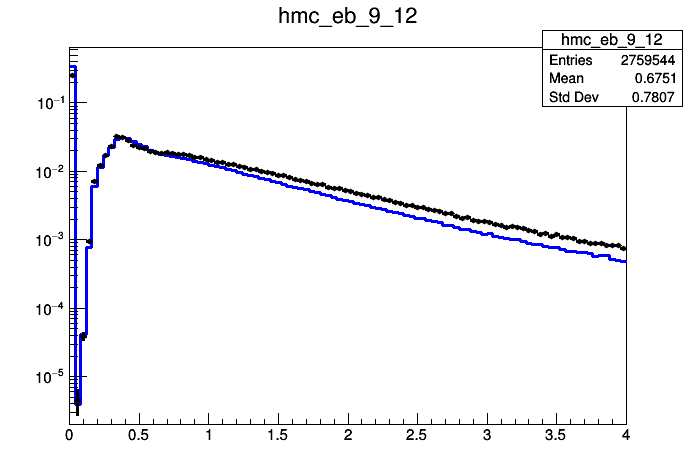

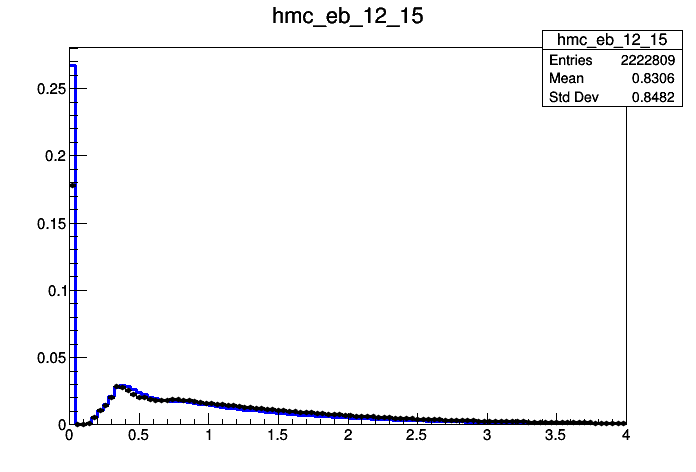

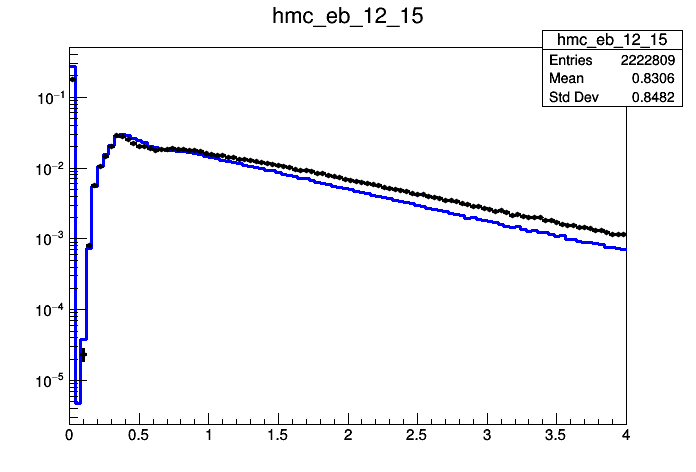

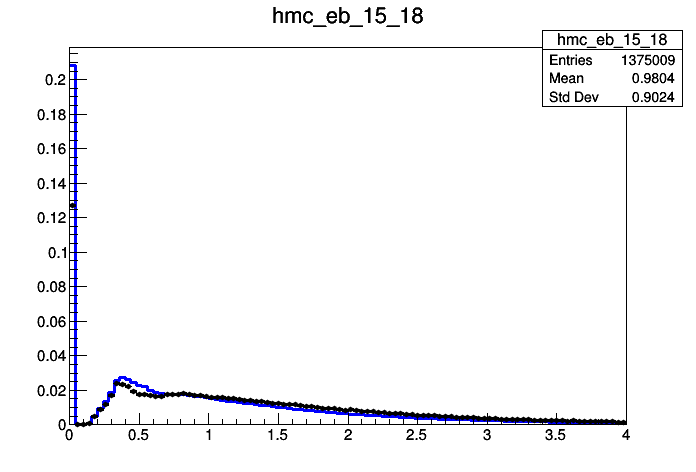

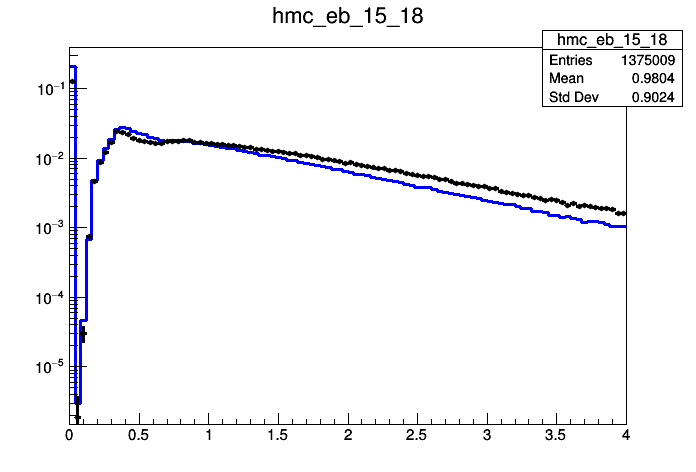

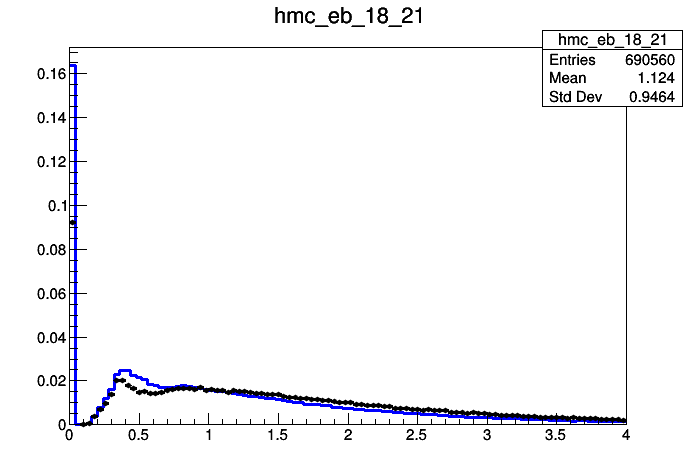

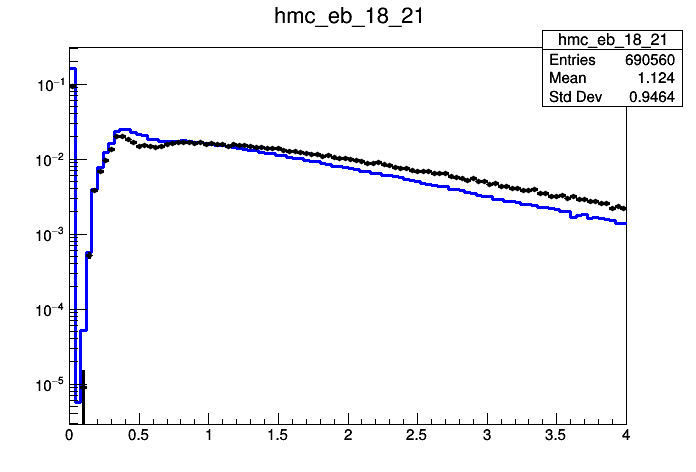

In [9]:
import ROOT as RT
for data,mc in zip(histos_eb[0],histos_eb[1]):
    canv = RT.TCanvas()
    
    mc.SetLineColor(RT.kBlue)
    mc.DrawNormalized("hist")
    data.SetMarkerColor(RT.kBlack)
    data.SetLineColor(RT.kBlack)
    data.DrawNormalized("pe same")
    canv.Draw()
    canv.SetLogy()
    canv.Draw()
    

In [10]:
reload(pic)

<module 'photonIsoCorrect' from 'photonIsoCorrect.pyc'>

In [11]:
# hist_1p5 = pic.Corrector.generate(histos_eb[1][0],1.5,500000)
# hist_2 = pic.Corrector.generate(histos_eb[1][0],2,500000)
# hist_2p5 = pic.Corrector.generate(histos_eb[1][0],2.5,500000)
# hist_3 = pic.Corrector.generate(histos_eb[1][0],3,500000)
# hist_3p5 = pic.Corrector.generate(histos_eb[1][0],3.5,500000)
# hist_4 = pic.Corrector.generate(histos_eb[1][0],4,500000)
# hist_5 = pic.Corrector.generate(histos_eb[1][0],5,500000)
# hist_6 = pic.Corrector.generate(histos_eb[1][0],6,500000)
# hist_7 = pic.Corrector.generate(histos_eb[1][0],7,500000)
# hist_8 = pic.Corrector.generate(histos_eb[1][0],8,500000)

grid = np.linspace(0.5,8,16)
print(grid)
interpolated = pic.Corrector.interpolate(histos_eb[1][0],grid,500000)


[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8. ]


In [12]:
print np.linspace(0.5,8,16)

[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8. ]


In [13]:
def plot(hdata,hmc,hinterp):
    canv = RT.TCanvas()
    hmc.DrawNormalized("hist")
    hdata.DrawNormalized("e same")
    
    for ih,h in enumerate(hinterp):
        h.SetLineColor(RT.kRed+ih)
        h.SetMarkerColor(RT.kRed+ih)
        h.DrawNormalized("hist same")
    canv.Draw()
    canv.SetLogy()
    canv.Draw()
        

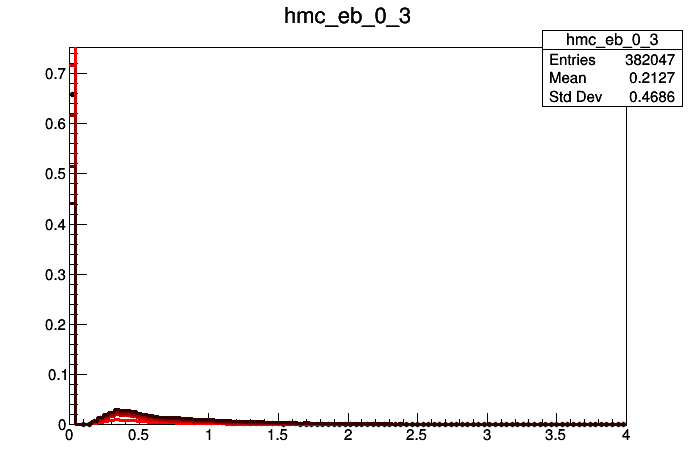

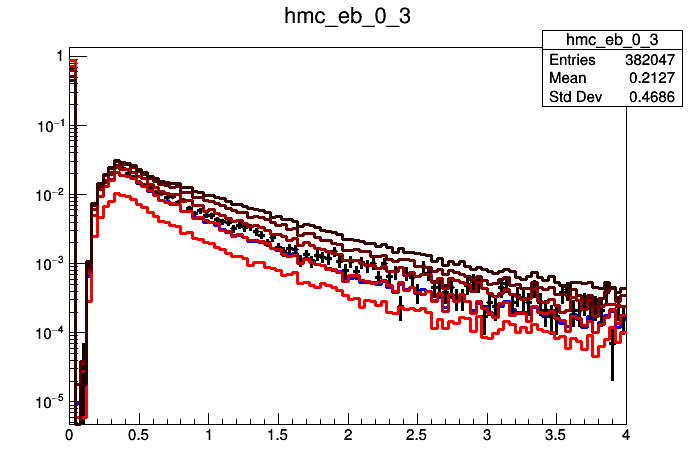

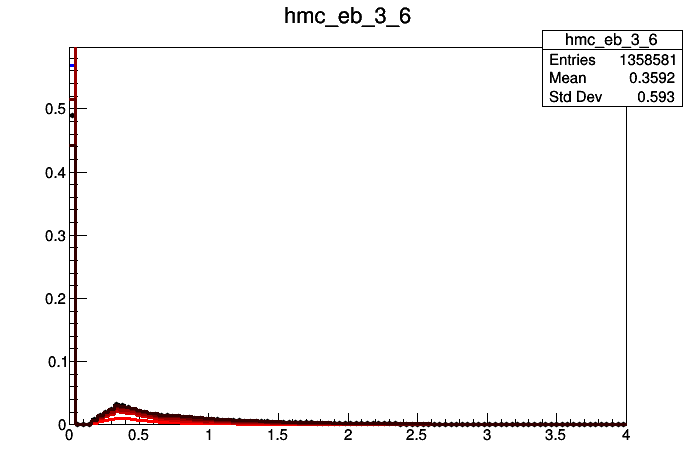

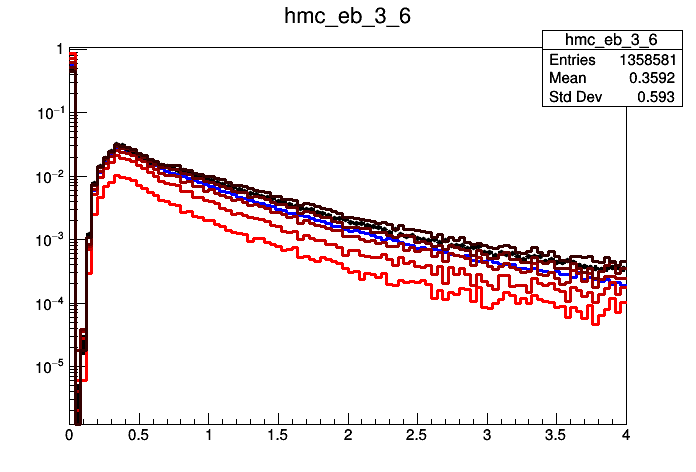

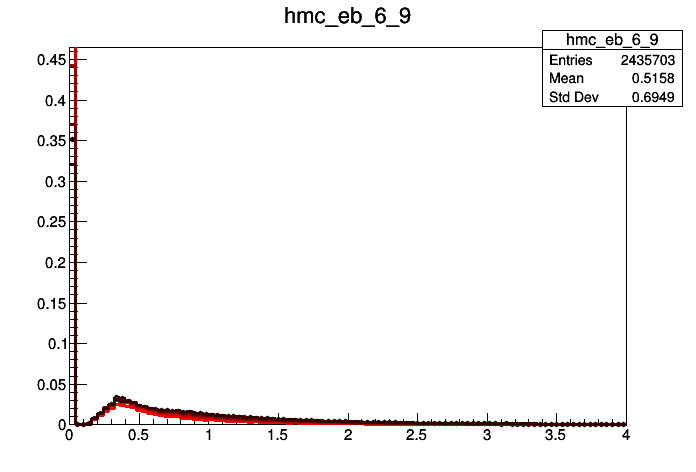

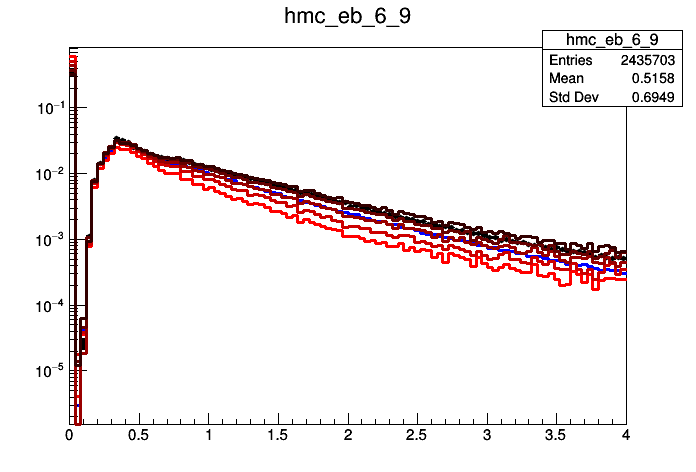

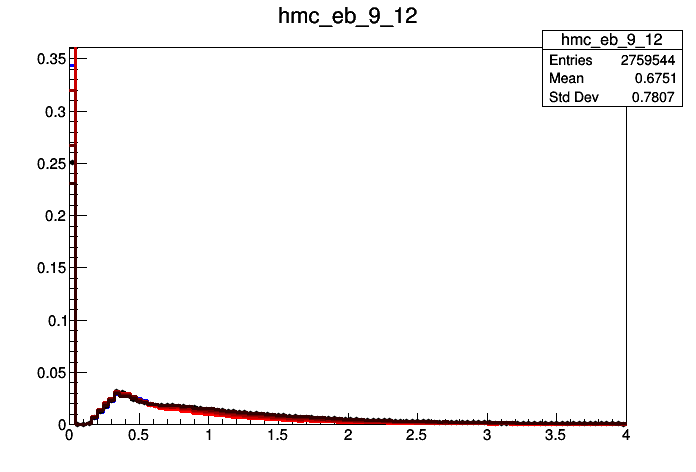

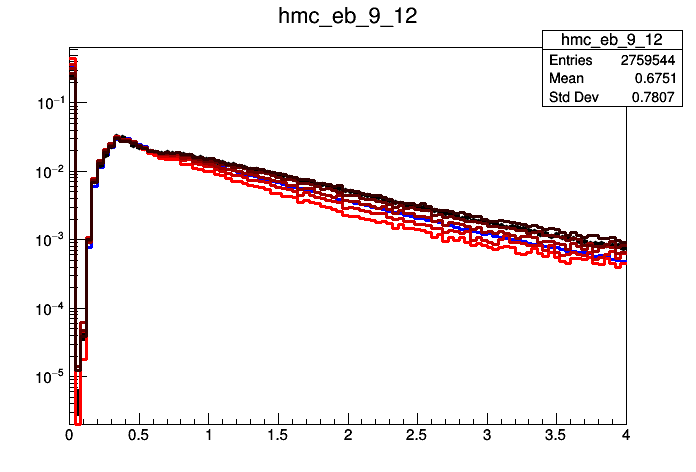

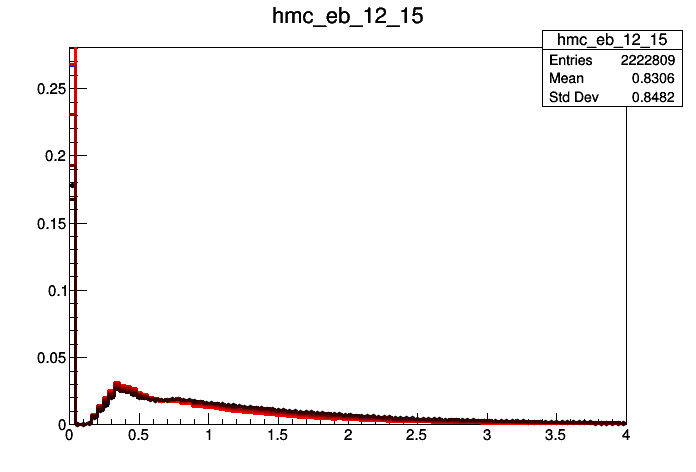

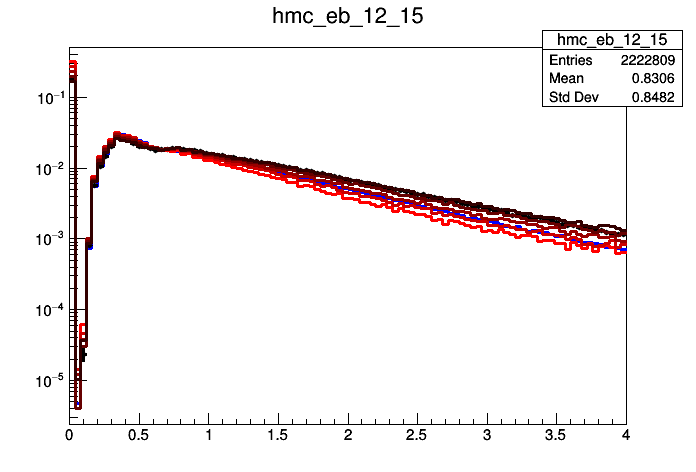

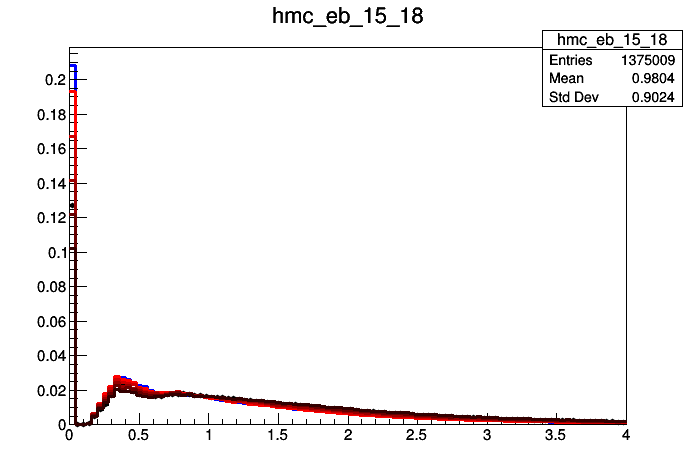

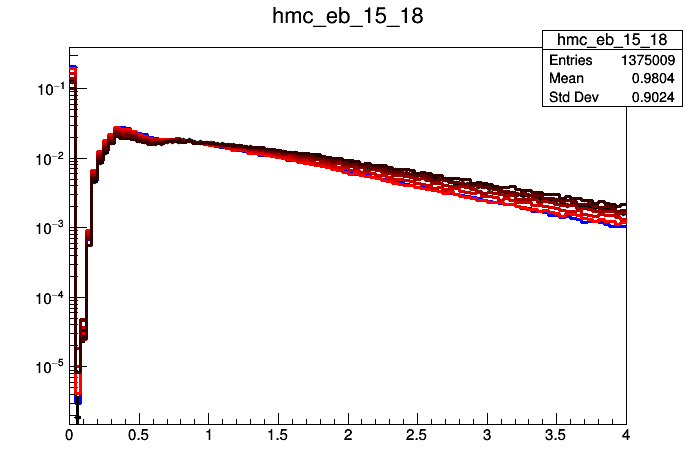

In [14]:
plot(histos_eb[0][0],histos_eb[1][0],interpolated[:5])
plot(histos_eb[0][1],histos_eb[1][1],interpolated[:5])
plot(histos_eb[0][2],histos_eb[1][2],interpolated[2:7])
plot(histos_eb[0][3],histos_eb[1][3],interpolated[4:9])
plot(histos_eb[0][4],histos_eb[1][4],interpolated[6:11])
plot(histos_eb[0][5],histos_eb[1][5],interpolated[9:14])
# plot(histos_eb[0][7],histos_eb[1][7],interpolated[12:16])


In [15]:
reload(pic)
xvar = RT.RooRealVar("x","x",0.,0.,4.)
xlist = RT.RooArgList(xvar)
pdfs = []
datasets = []
for h in interpolated:
    ds = RT.RooDataHist(h.GetName(),h.GetName(),xlist,h)
    datasets.append(ds)
    pdf = RT.RooHistPdf("%s_pdf" % h.GetName(), "%s_pdf" % h.GetName(), RT.RooArgSet(xlist), ds)
    pdfs.append(pdf)
    
multvar = RT.RooRealVar("mult","mult",grid[0],grid[0],grid[-1])    
morph = pic.Corrector.mkMomentMorph("morph",xlist,pdfs,multvar,grid)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hmc_eb_0_3_mult_0p50): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hmc_eb_0_3_mult_1p00): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hmc_eb_0_3_mult_1p50): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hmc_eb_0_3_mult_2p00): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hmc_eb_0_3_mult_2p50): fit range of variable x expanded to nearest bin boundaries: [0,4]

[1, 1.2, 1.5, 1.8, 2, 2.2, 2.5, 8]


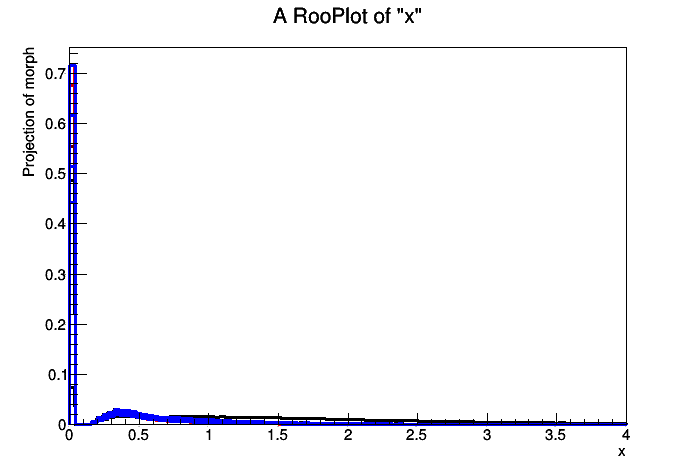

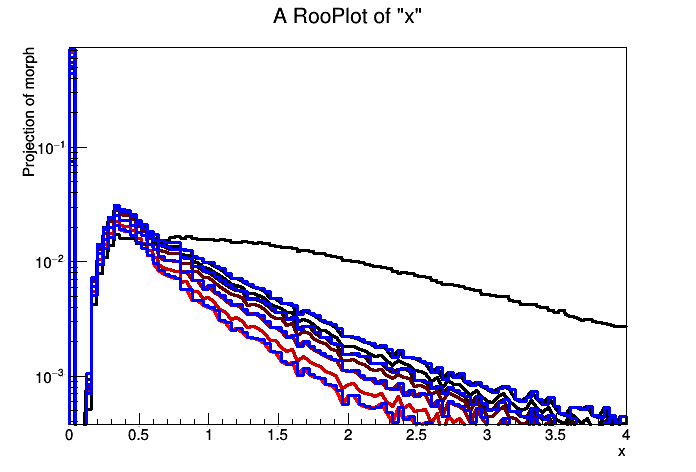

In [16]:
frame = xvar.frame()


scan = [1,1.2,1.5,1.8,2,2.2,2.5,8]
print(scan)
for ip,ival in enumerate(scan):
    multvar.setVal(ival)
    morph.plotOn(frame,RT.RooFit.LineColor(RT.kRed+ip))
# pdfs[0].plotOn(frame,RT.RooFit.LineColor(RT.kRed))

pdfs[1].plotOn(frame,RT.RooFit.LineColor(RT.kBlue))
pdfs[2].plotOn(frame,RT.RooFit.LineColor(RT.kBlue))
pdfs[3].plotOn(frame,RT.RooFit.LineColor(RT.kBlue))
pdfs[4].plotOn(frame,RT.RooFit.LineColor(RT.kBlue))
canv = RT.TCanvas()
frame.Draw()
canv.Draw()
canv.SetLogy()
canv.Draw()

In [17]:
def fit(imult):    

    h = histos_eb[0][imult]
    data = RT.RooDataHist(h.GetName(),h.GetName(),xlist,h)

    h = histos_eb[1][imult]
    mc = RT.RooDataHist(h.GetName(),h.GetName(),xlist,h)

    mcpdf = RT.RooHistPdf(h.GetName(),h.GetName(),RT.RooArgSet(xlist), mc)

    nll = morph.createNLL(data)
    minim = RT.RooMinimizer(nll)
    minim.migrad()
    minim.minos()

    multmc = multvar.getVal()

    frame = xvar.frame()
    data.plotOn(frame,RT.RooFit.MarkerColor(RT.kBlack))
    morph.plotOn(frame,RT.RooFit.LineColor(RT.kRed))
    mcpdf.plotOn(frame,RT.RooFit.LineColor(RT.kBlue))


    canv = RT.TCanvas()
    frame.Draw()
    canv.Draw()
    canv.SetLogy()
    canv.Draw()

    nll = morph.createNLL(mc)
    minim = RT.RooMinimizer(nll)
    minim.migrad()
    minim.minos()

    frame = xvar.frame()
    mc.plotOn(frame,RT.RooFit.MarkerColor(RT.kBlue))
    morph.plotOn(frame,RT.RooFit.LineColor(RT.kRed))

    multdata = multvar.getVal()

    canv = RT.TCanvas()
    frame.Draw()
    canv.Draw()
    canv.SetLogy()
    canv.Draw()

    return (imult,multdata,multmc)

In [18]:
mults = []

# for imult in xrange(len(histos_eb[0])):
#     mults.append( fit(imult) )


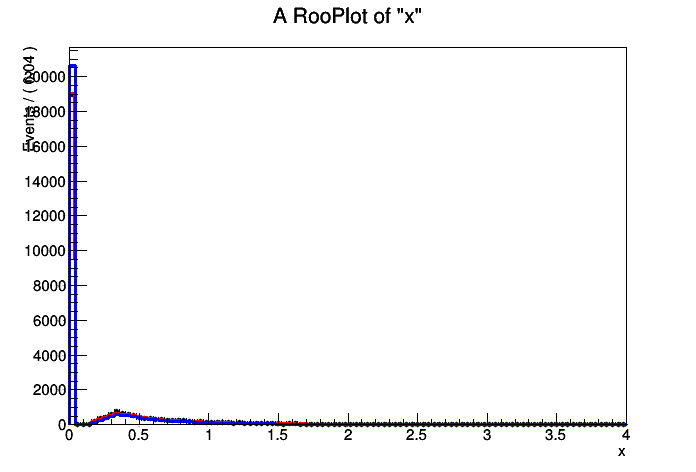

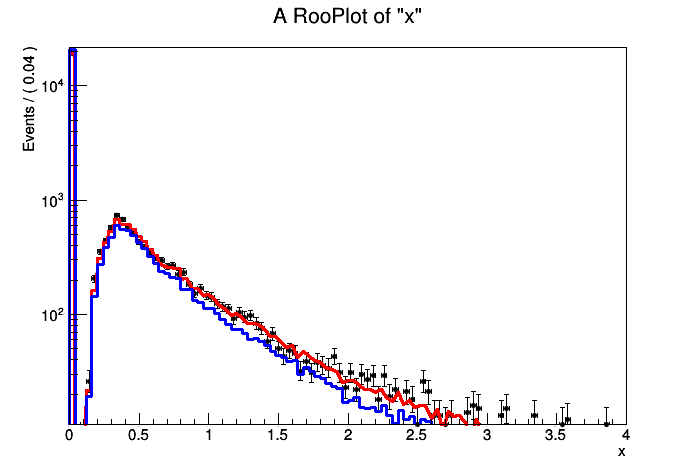

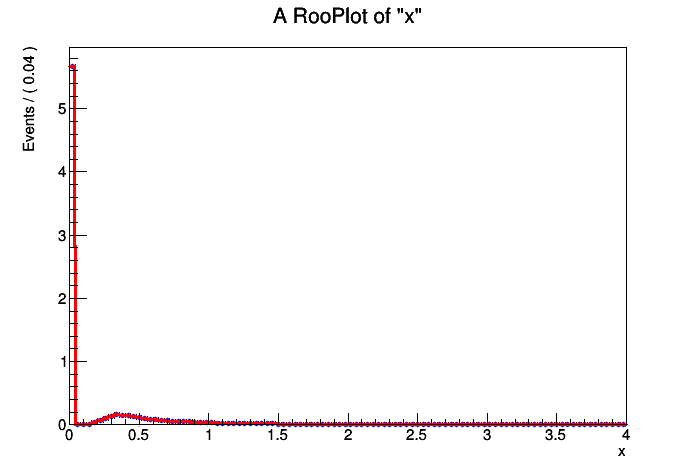

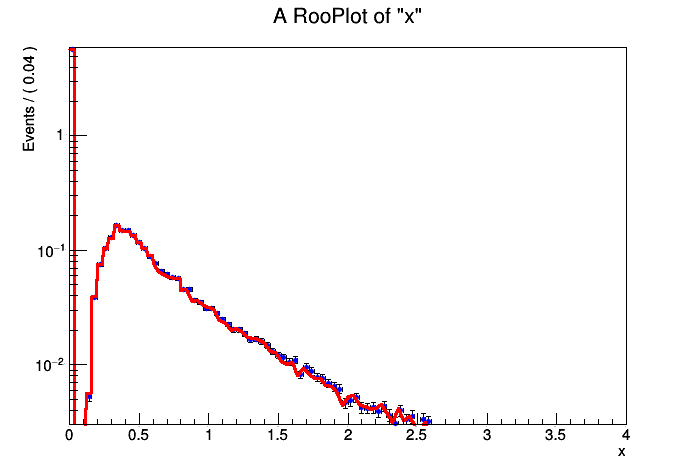

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hdata_eb_0_3): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hmc_eb_0_3): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mult         8.00000e+00  7.50000e-01    5.00000e-01  8.00000e+00
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 IS AT ITS UPPER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 BROUGHT BACK INSIDE LIMITS.
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINS

In [19]:
mults.append( fit(0) )

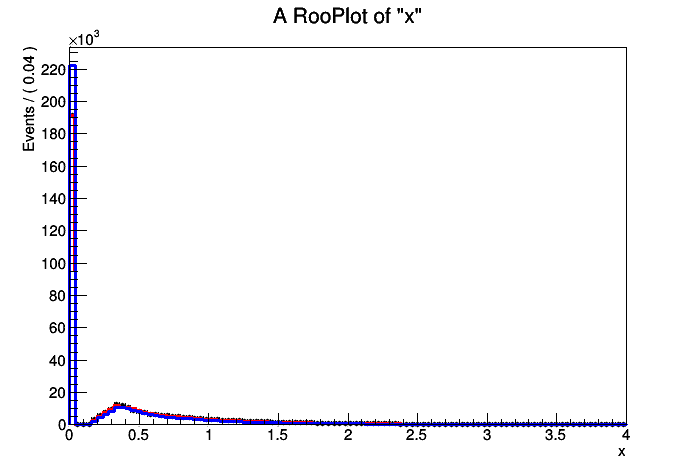

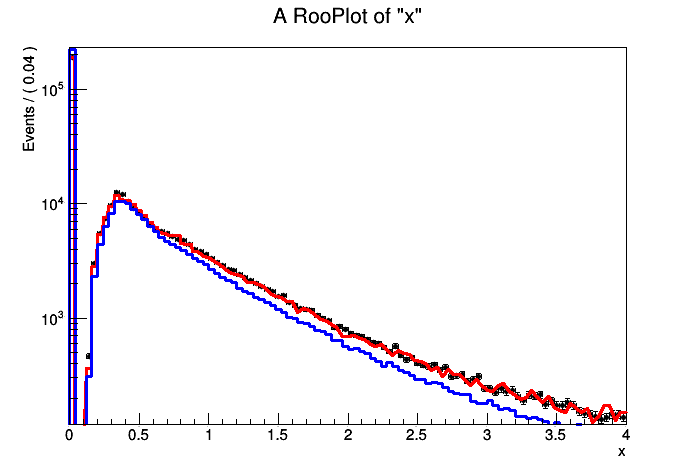

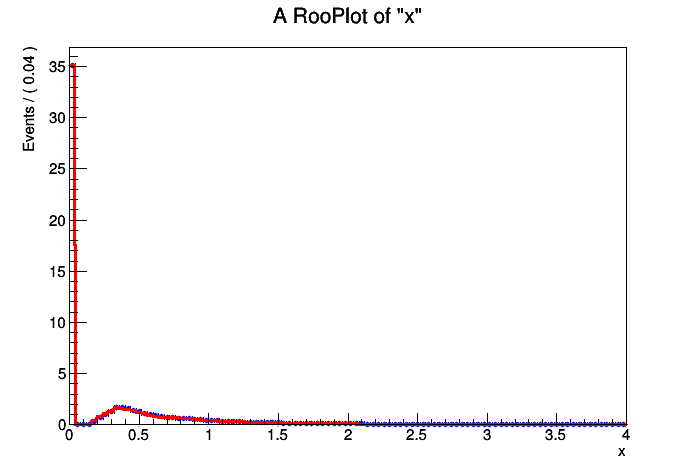

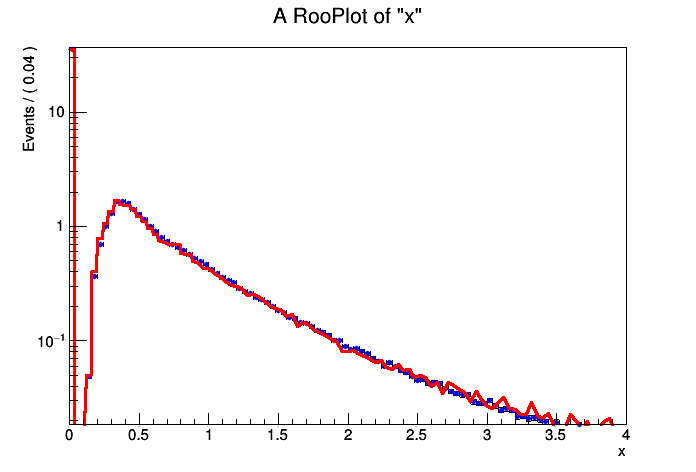

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hdata_eb_3_6): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hmc_eb_3_6): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
 **********
 **   15 **SET PRINT           1
 **********
 **********
 **   16 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mult         9.96209e-01  5.49239e-01    5.00000e-01  8.00000e+00
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 BROUGHT BACK INSIDE LIMITS.
 **********
 **   17 **SET ERR         0.5
 **********
 **********
 **   18 **SET PRINT           1
 **********
 **********
 **   19 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   20 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD M

In [20]:
mults.append( fit(1) )

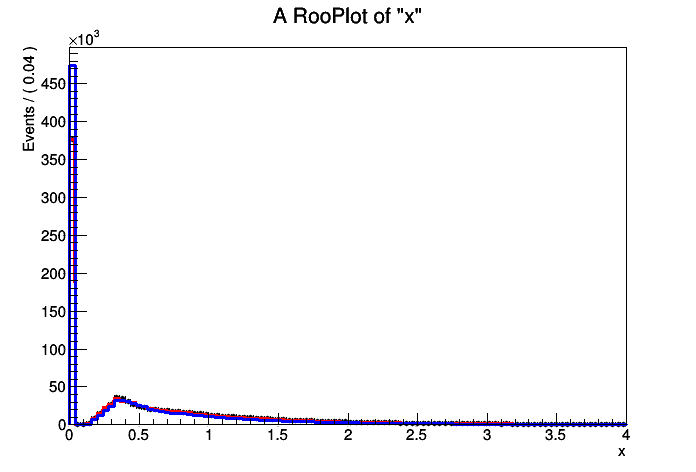

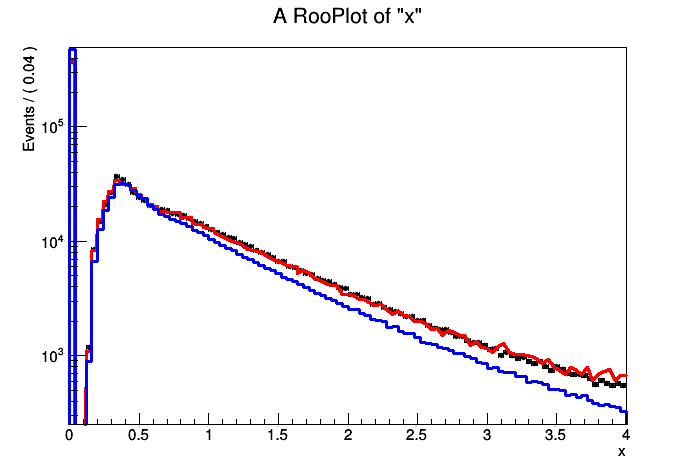

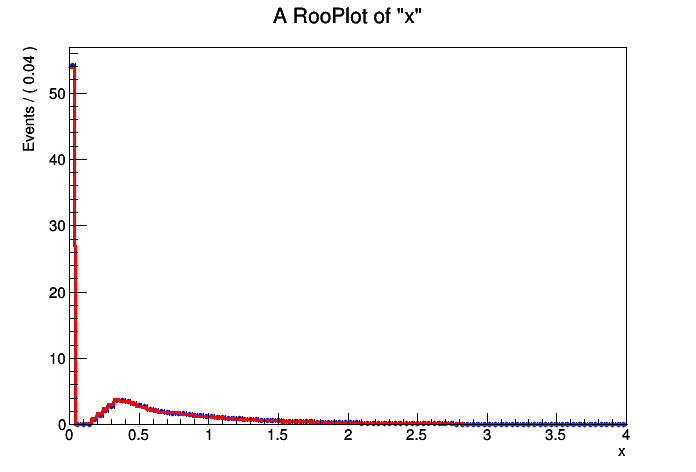

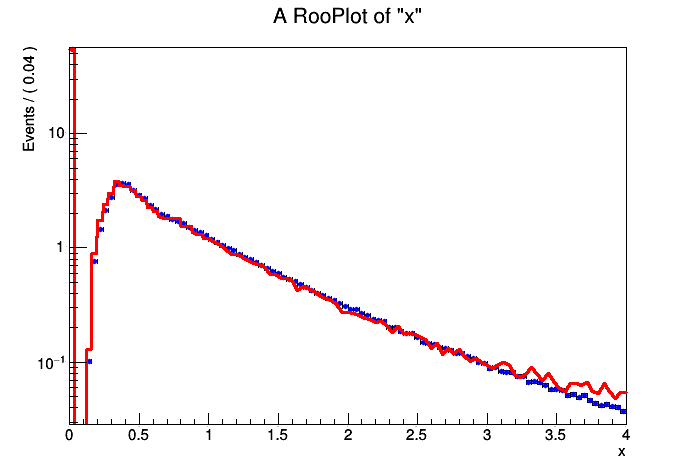

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hdata_eb_6_9): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hmc_eb_6_9): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
 **********
 **   29 **SET PRINT           1
 **********
 **********
 **   30 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mult         1.72885e+00  3.01403e-01    5.00000e-01  8.00000e+00
 **********
 **   31 **SET ERR         0.5
 **********
 **********
 **   32 **SET PRINT           1
 **********
 **********
 **   33 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   34 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=155550 FROM MI

In [21]:
mults.append( fit(2) )

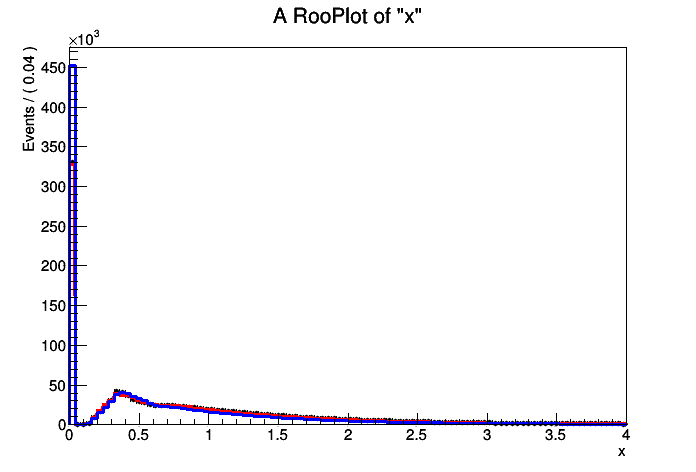

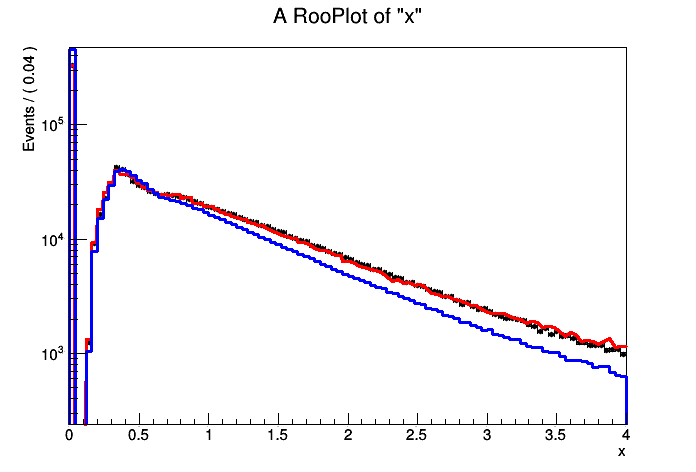

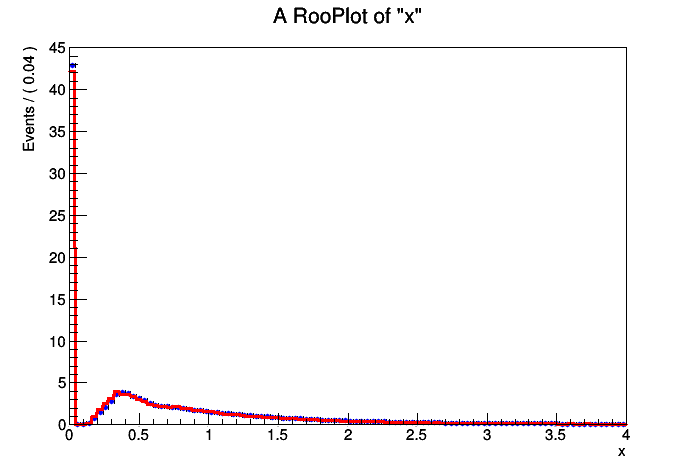

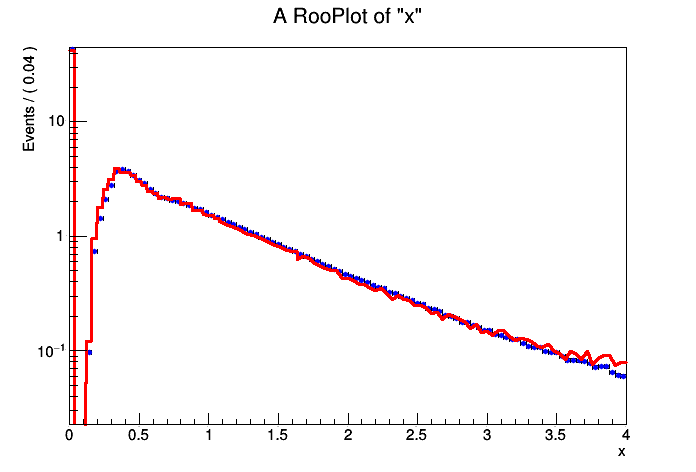

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hdata_eb_9_12): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hmc_eb_9_12): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
 **********
 **   43 **SET PRINT           1
 **********
 **********
 **   44 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mult         2.51260e+00  2.56752e-01    5.00000e-01  8.00000e+00
 **********
 **   45 **SET ERR         0.5
 **********
 **********
 **   46 **SET PRINT           1
 **********
 **********
 **   47 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   48 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=733103 FROM 

In [22]:
mults.append( fit(3) )

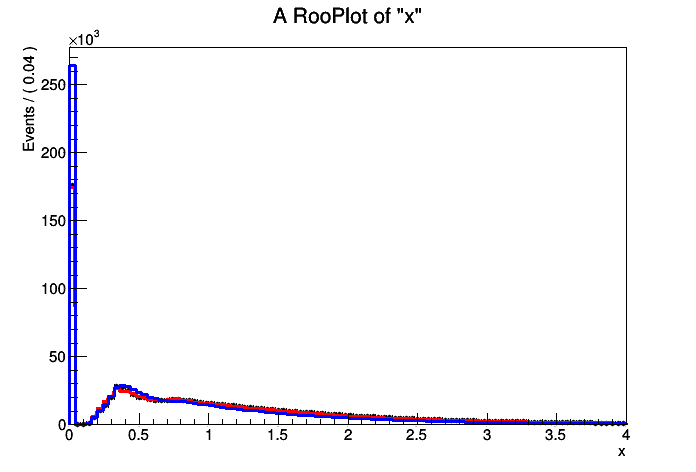

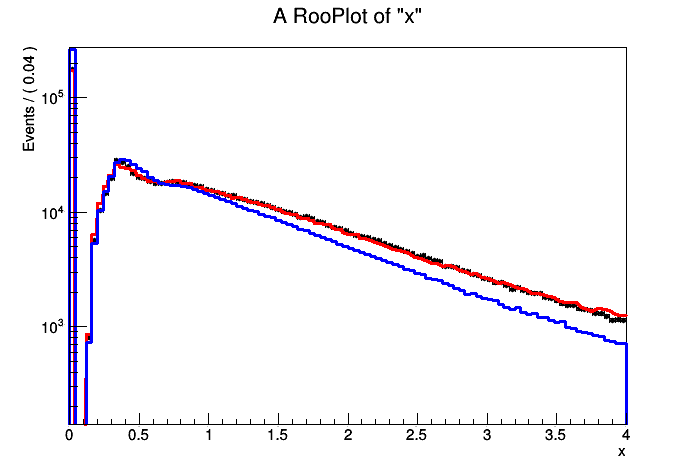

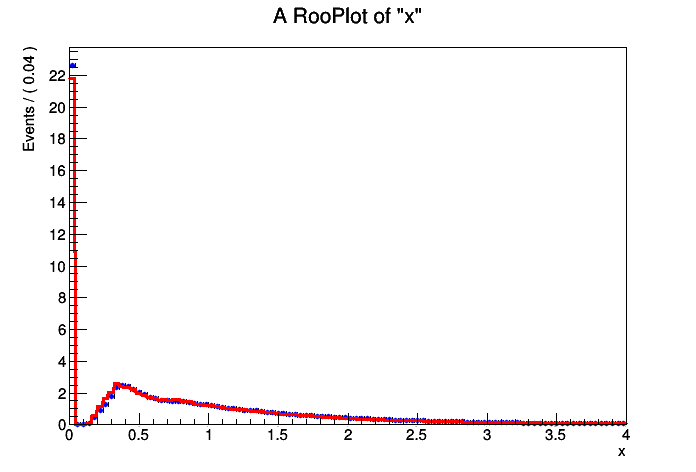

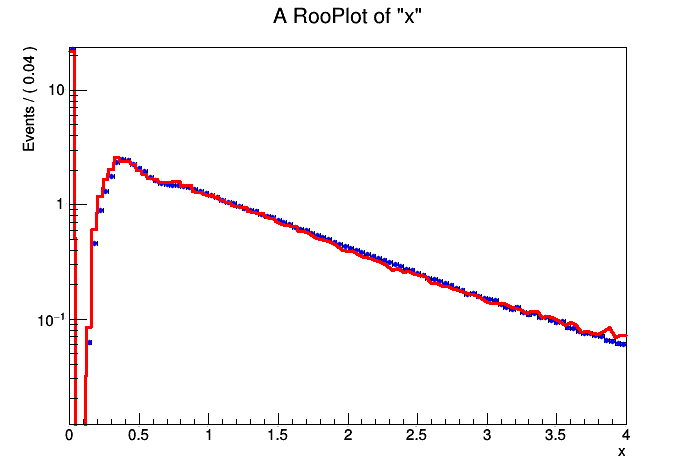

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hdata_eb_12_15): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hmc_eb_12_15): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
 **********
 **   57 **SET PRINT           1
 **********
 **********
 **   58 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mult         3.31805e+00  3.44467e-01    5.00000e-01  8.00000e+00
 **********
 **   59 **SET ERR         0.5
 **********
 **********
 **   60 **SET PRINT           1
 **********
 **********
 **   61 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   62 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=845253 FRO

In [23]:
mults.append( fit(4) )

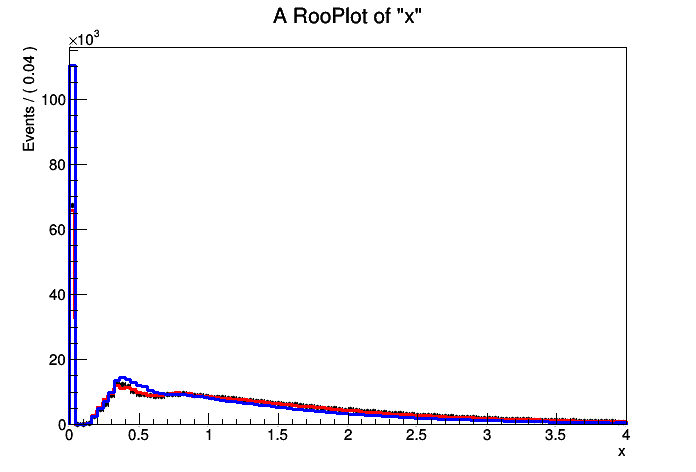

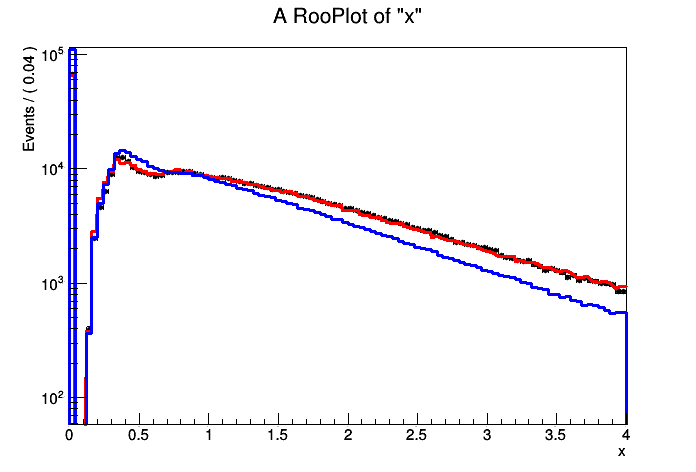

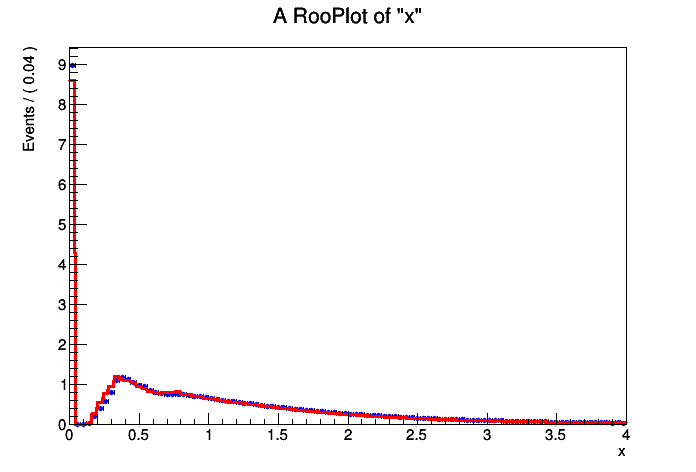

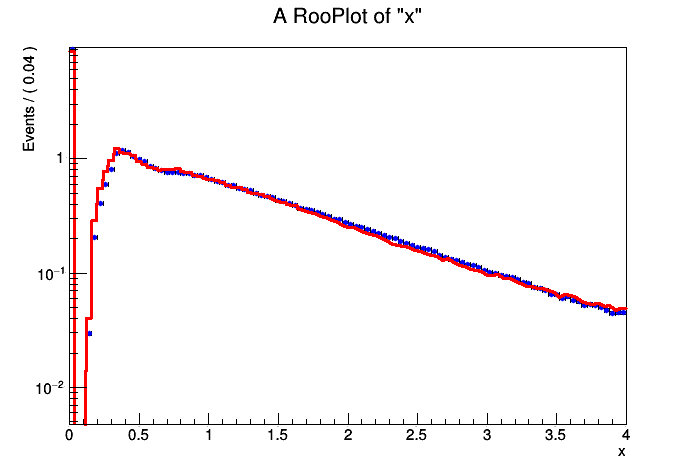

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hdata_eb_15_18): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hmc_eb_15_18): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
 **********
 **   71 **SET PRINT           1
 **********
 **********
 **   72 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mult         4.13094e+00  4.75130e-01    5.00000e-01  8.00000e+00
 **********
 **   73 **SET ERR         0.5
 **********
 **********
 **   74 **SET PRINT           1
 **********
 **********
 **   75 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   76 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=563503 FRO

In [24]:
mults.append( fit(5) )

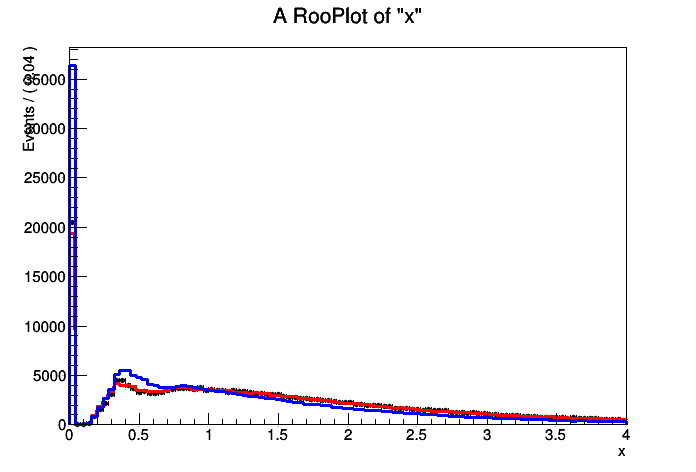

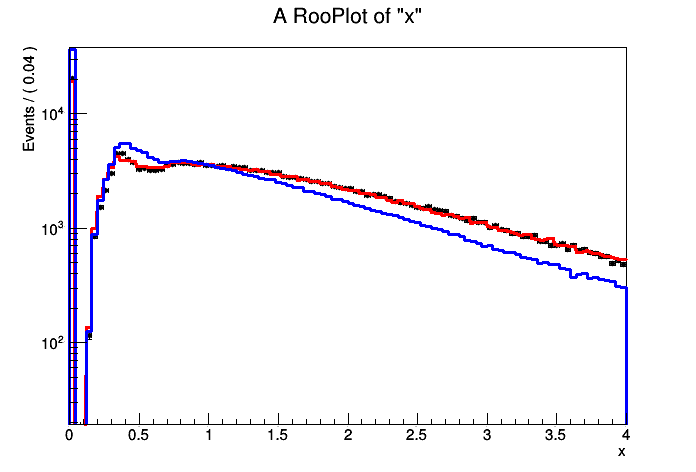

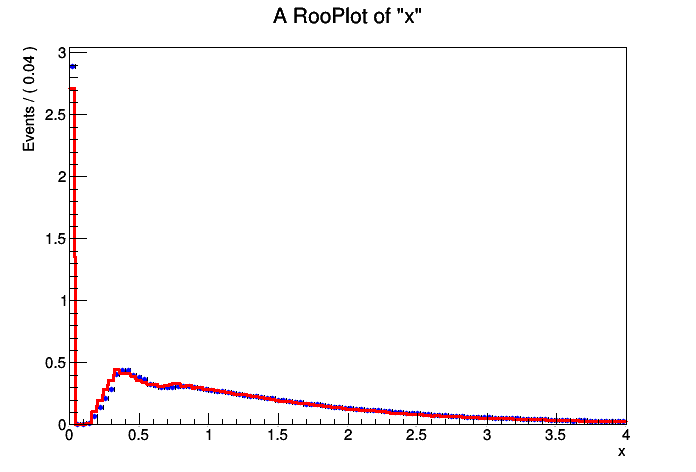

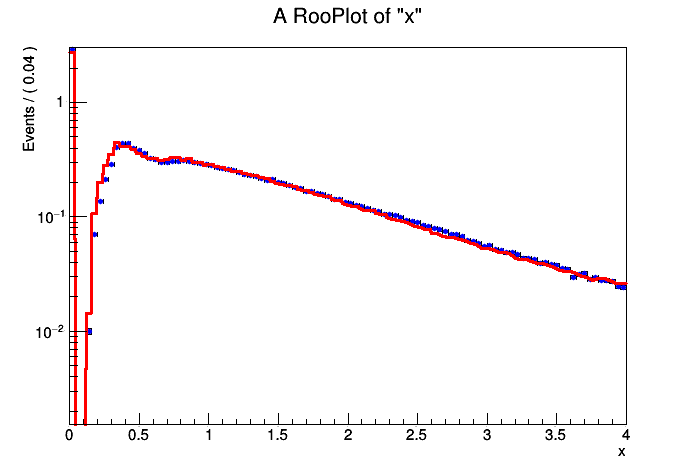

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hdata_eb_18_21): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(hmc_eb_18_21): fit range of variable x expanded to nearest bin boundaries: [0,4] --> [0,4]
 **********
 **   85 **SET PRINT           1
 **********
 **********
 **   86 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mult         4.90397e+00  6.38477e-01    5.00000e-01  8.00000e+00
 **********
 **   87 **SET ERR         0.5
 **********
 **********
 **   88 **SET PRINT           1
 **********
 **********
 **   89 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   90 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=267830 FRO

In [25]:
mults.append( fit(6) )

In [26]:
mults

[(0, 0.9962091062346159, 1.2803303138103088),
 (1, 1.7288504685976867, 2.1751328615899217),
 (2, 2.5125950778233617, 3.1919756121263836),
 (3, 3.318054050337954, 4.249202509241231),
 (4, 4.130935972315859, 5.325065912017764),
 (5, 4.903970299185714, 6.439483419361998),
 (6, 5.757888930796648, 7.545719203256901)]

In [27]:
print(map(lambda x: (x[0], x[2]-x[1]), mults))

[(0, 0.2841212075756929), (1, 0.44628239299223504), (2, 0.6793805343030219), (3, 0.931148458903277), (4, 1.194129939701905), (5, 1.535513120176284), (6, 1.787830272460253)]


In [28]:
print(map(lambda x: (x[0], x[2]/x[1]), mults))

[(0, 1.2852023794980045), (1, 1.258138226005298), (2, 1.2703899805819738), (3, 1.2806308893034568), (4, 1.2890700673417748), (5, 1.313116317289126), (6, 1.3105010002707524)]
